In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [3]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

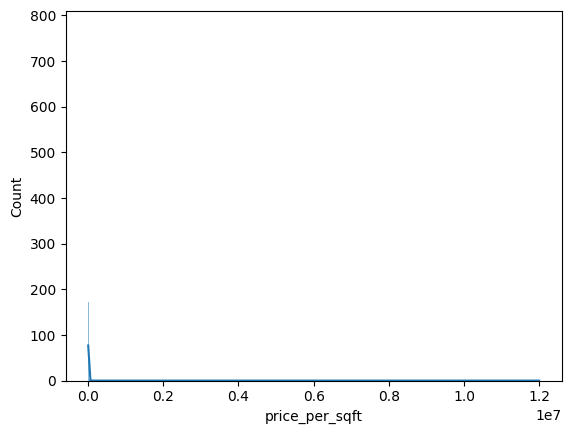

In [4]:
sns.histplot(df.price_per_sqft,kde = True)

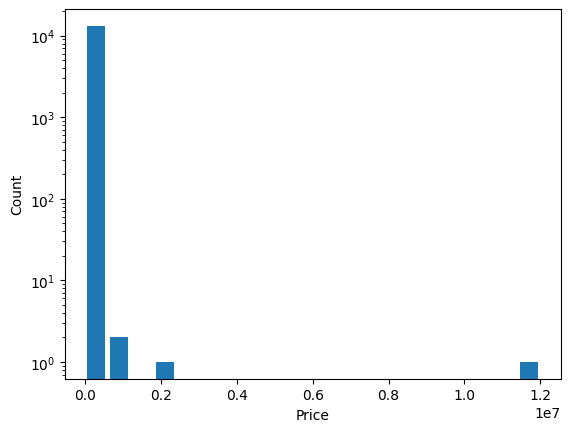

In [5]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft,bins = 20,rwidth = 0.8)
plt.xlabel("Price")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

# **Lowest and Highest value of Data in the Dataset**

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

## **Data without Outliers**

In [7]:
df2 = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df2.shape

(13172, 7)

# **Outliers** **Data**

In [8]:
outliers = df.price_per_sqft[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]
outliers

,price_per_sqft
345,672727
665,371
798,729
1005,200000
1106,625000
1867,267
2392,1250
3934,1300
4044,12000000
4924,2300000


# **No.of.Oulier Data**

In [9]:
df.price_per_sqft.shape[0] - df2.shape[0]

28

In [10]:
mean = df2.price_per_sqft.mean()
print(mean)

6663.6537351958705


In [11]:
std = df2.price_per_sqft.std()
print(std)

4141.020700174605


In [12]:
mean - 4*std

np.float64(-9900.429065502549)

In [13]:
mean + 4*std

np.float64(23227.73653589429)

In [14]:
df3 = df2[(df2.price_per_sqft < -9900.42) | (df2.price_per_sqft > 23227.73)]
df3.shape

(125, 7)

In [15]:
no_outlier = df2[(df2.price_per_sqft > -9900.42) & (df2.price_per_sqft < 23227.73)]
no_outlier.shape

(13047, 7)

In [16]:
df2.shape[0] - no_outlier.shape[0]

125

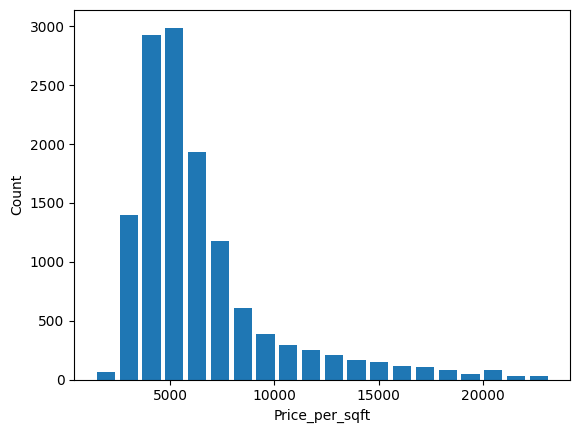

In [17]:
plt.hist(no_outlier.price_per_sqft,bins=20,rwidth = 0.8)
plt.xlabel("Price_per_sqft")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

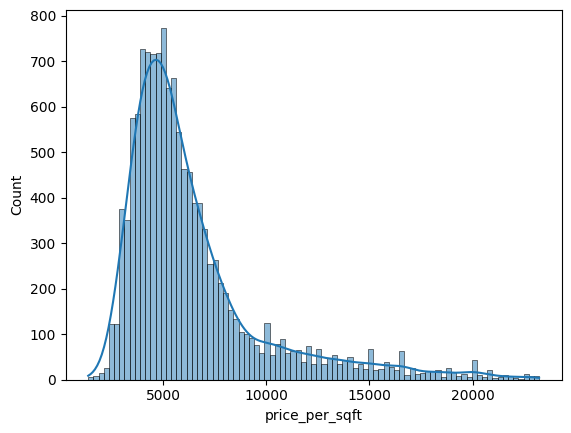

In [18]:
sns.histplot(no_outlier.price_per_sqft,kde = True)

# ***Removing Outliers using Z_SCORE ***

In [19]:
df2['Z_score'] = (df2.price_per_sqft - mean)/std
df2.head()

/tmp/ipython-input-2753152485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Z_score'] = (df2.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [20]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [21]:
df4 = df2[(df2.Z_score < -4) | (df2.Z_score > 4)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [22]:
without_outlier = df2[(df2.Z_score > -4) & (df2.Z_score < 4)]
without_outlier.shape

(13047, 8)

In [23]:
df2.Z_score.shape[0] - without_outlier.shape[0]

125

<Axes: xlabel='Z_score', ylabel='Count'>

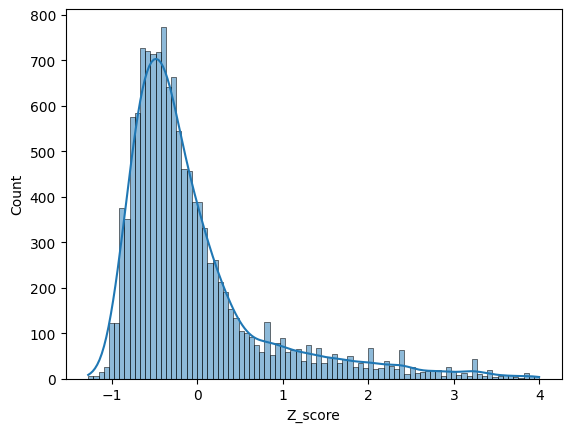

In [24]:
sns.histplot(without_outlier.Z_score,kde = True)